In [50]:
using ColorSchemes
using DataFrames
using MLBase
using Plots
using Statistics
using StatsBase
using StatsPlots
using XLSX

gr()

Plots.GRBackend()

In [4]:
ENV["GKS_ENCODING"] = "utf-8"

"utf-8"

In [5]:
stateabbrs = Dict(
    "Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CN",
    "Delaware" => "DE",
    "District of Columbia" => "DC",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KA",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH", 
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC", 
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PN", 
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT", 
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY")

Dict{String, String} with 51 entries:
  "Alaska"         => "AK"
  "Colorado"       => "CO"
  "Texas"          => "TX"
  "Alabama"        => "AL"
  "Massachusetts"  => "MA"
  "Vermont"        => "VT"
  "Missouri"       => "MO"
  "Wyoming"        => "WY"
  "California"     => "CA"
  "Florida"        => "FL"
  "Michigan"       => "MI"
  "Iowa"           => "IA"
  "Maine"          => "ME"
  "Tennessee"      => "TN"
  "Nevada"         => "NV"
  "Kentucky"       => "KY"
  "Delaware"       => "DE"
  "Indiana"        => "IN"
  "North Carolina" => "NC"
  "Pennsylvania"   => "PN"
  "Louisiana"      => "LA"
  "Oklahoma"       => "OK"
  "South Carolina" => "SC"
  "Nebraska"       => "NE"
  "Virginia"       => "VA"
  ⋮                => ⋮

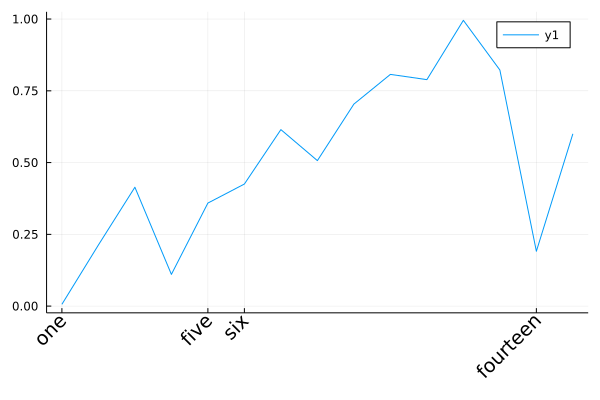

In [6]:
xtickslabels = ["one", "five", "six", "fourteen"]
p = plot(rand(15), 
         xticks=([1, 5, 6, 14], xtickslabels), 
         xrotation=45, 
         xtickfont=font(13))

In [16]:
d = DataFrame(
    XLSX.readtable("../../data/zillow_data_download_april2020.xlsx", 
                   "Sales_median_price_city"
    )...)
dropmissing!(d)
states = d[:, :StateName]

1174-element Vector{Any}:
 "California"
 "Texas"
 "Illinois"
 "Texas"
 "Pennsylvania"
 "Arizona"
 "Nevada"
 "Texas"
 "Texas"
 "California"
 "California"
 "North Carolina"
 "Texas"
 ⋮
 "Pennsylvania"
 "Colorado"
 "Pennsylvania"
 "Florida"
 "Pennsylvania"
 "California"
 "Florida"
 "Pennsylvania"
 "New Jersey"
 "Florida"
 "Arizona"
 "Florida"

In [17]:
nyids = findall(states .== "New York")
caids = findall(states .== "California")
flids = findall(states .== "Florida")
nyframe = dropmissing(d[nyids, :])
caframe = dropmissing(d[caids, :])
flframe = dropmissing(d[flids, :]);

In [18]:
ca = caframe[!, Symbol("2020-02")]
ny = nyframe[!, Symbol("2020-02")]
fl = flframe[!, Symbol("2020-02")];

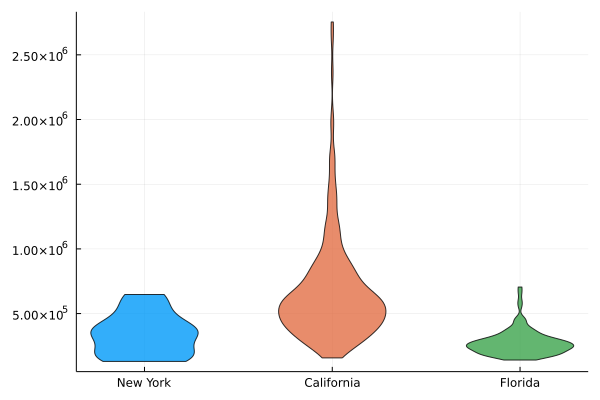

In [19]:
violin(["New York"], ny, legend=false, alpha=0.8)
violin!(["California"], ca, alpha=0.8)
violin!(["Florida"], fl, alpha=0.8)

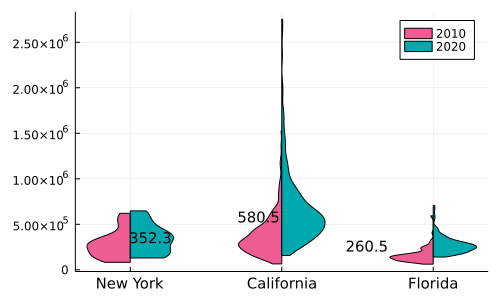

In [20]:
ca10 = caframe[!, Symbol("2010-02")]
ny10 = nyframe[!, Symbol("2010-02")]
fl10 = flframe[!, Symbol("2010-02")]
violin(["New York"], ny10, side=:left, color=7, label="2010")
violin!(["New York"], ny, side=:right, color=6, label="2020")
violin!(["California"], ca10, side=:left, color=7, label="")
violin!(["California"], ca, side=:right, color=6, label="")
violin!(["Florida"], fl10, side=:left, color=7, label="")
violin!(["Florida"], fl, side=:right, color=6, label="")

ep = 0.
for (i, state) in enumerate([ny, ca, fl])
    m = median(state)
    annotate!([(i - 0.5, m + 0.05, text(m / 1000, 10, :left))])
end

plot!(xtickfont=font(10), size=(500, 300))

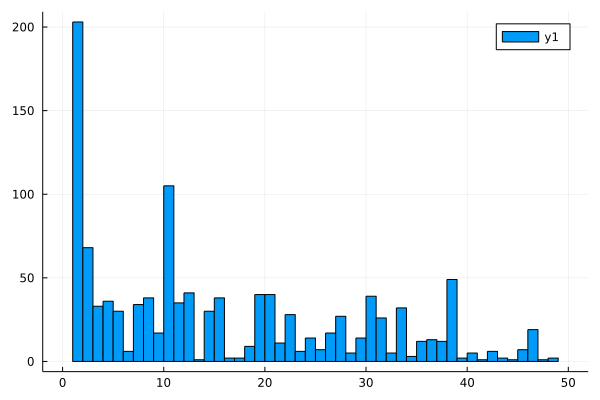

In [21]:
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
histogram(stateids, nbins=50)

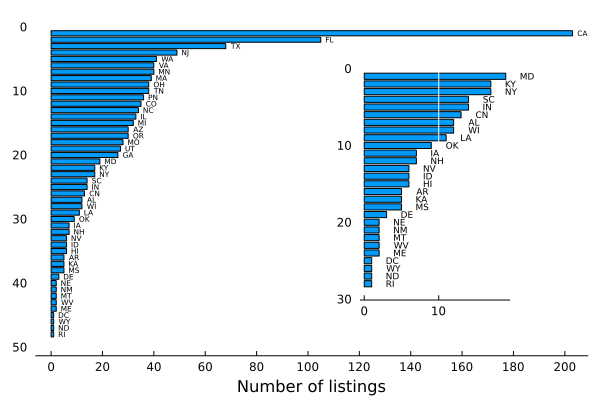

In [22]:
h = fit(Histogram, stateids, nbins=50)
sortids = sortperm(h.weights, rev=true)
bar(h.weights[sortids], legend=false, orientation=:horizontal, yflip=true)

stateannot = mapstates.vs[sortids]
for i = 1:length(stateannot)
    annotate!([
        (h.weights[sortids][i] + 2, 
        i, 
        text(stateabbrs[stateannot[i]], 5, :left))])
end
plot!(grid=false, yaxis=false, xticks=0:20:200)
xlabel!("Number of listings")

f = Plots.plot!(inset=bbox(0.6, 0.15, 0.25, 0.6, :top, :left))
bar!(f[2], 
     h.weights[sortids][21:end], 
     legend=false, 
     orientation=:horizontal, 
     yflip=true)
for i = 21:length(stateannot)
    annotate!(f[2], 
              [(h.weights[sortids][i] + 2, 
                i - 20, 
                text(stateabbrs[stateannot[i]], 
                6, 
                :left))])
end
plot!(f[2], 
      [10, 10], 
      [20, 0], 
      color=:white, 
      xticks=0:10:20, 
      yaxis=false, 
      grid=false)
plot!()

In [23]:
M = Matrix(nyframe[:, 5:end])
xticklabels = string.(names(nyframe[!, 5:end]));

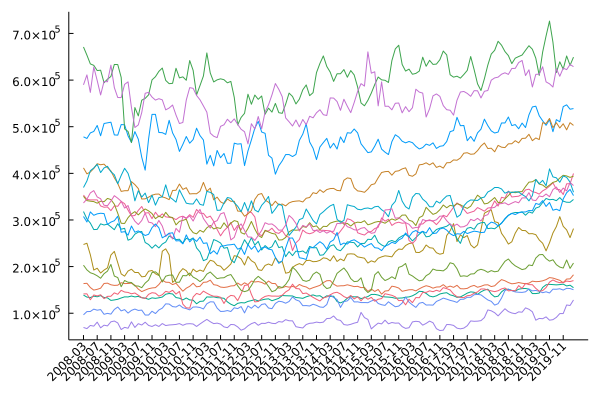

In [26]:
plot()
for i = 1:size(M, 1)
    plot!(M[i, :], legend=false)
end

plot!()
p = plot!(xticks=(1:4:length(xticklabels), xticklabels[1:4:end]), 
          xrotation=45, 
          xtickfont=font(8), 
          grid=false)

In [27]:
function findpercentile(M, p)
    r = zeros(size(M, 2))
    for i = 1:size(M, 2)
        v = M[:, i]
        len = length(v)
        ind = floor(Int64, p * len)
        newarr = sort(v)
        r[i] = newarr[ind]
    end
    r
end

findpercentile (generic function with 1 method)

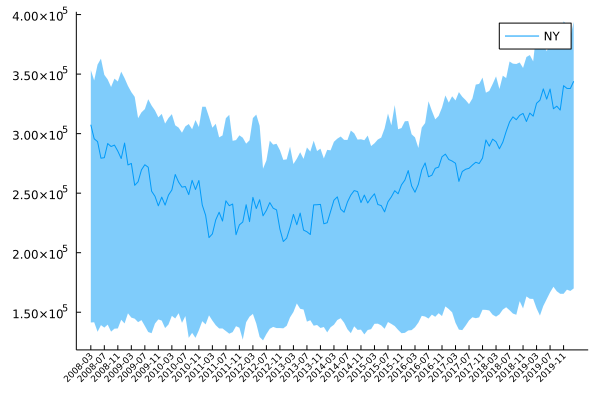

In [30]:
md = findpercentile(M, 0.5)
mn = findpercentile(M, 0.25)
mx = findpercentile(M, 0.75)
plot(md, ribbon=(md .- mn, mx .- md), color=1, label="NY", grid=false)
p = plot!(xticks=(1:4:length(xticklabels), xticklabels[1:4:end]), 
          xrotation=45, 
          xtickfont=font(6))

In [32]:
function plotstate!(plotid, state, colorid)
    curids = findall(states .== state)
    curframe = d[curids, :]
    M = Matrix(curframe[:, 5:end])
    md = findpercentile(M, 0.5)
    lq = findpercentile(M, 0.25)
    uq = findpercentile(M, 0.75)
    plot!(plotid, 
          md, 
          ribbon=(md .- lq, uq .- md), 
          color=colorid, 
          label=stateabbrs[state], 
          grid=false)
    plot!(plotid, 
          xticks=(1:4:length(xticklabels), xticklabels[1:4:end]), 
          xrotation=45, 
          xtickfont=font(6))
end

plotstate! (generic function with 1 method)

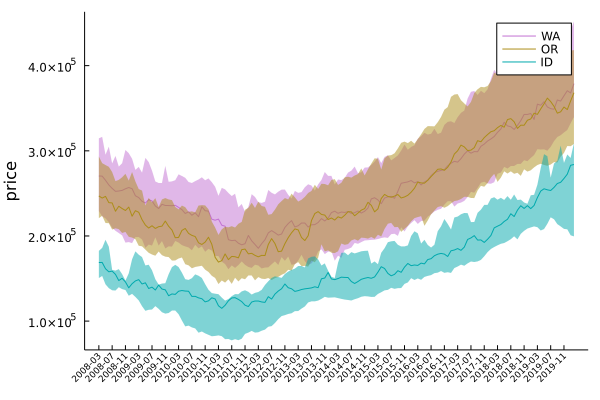

In [36]:
plotid = plot()
#plotstate!(plotid, "Illinois", 1)
#plotstate!(plotid, "California", 2)
#plotstate!(plotid, "Colorado", 3)
plotstate!(plotid, "Washington", 4)
plotstate!(plotid, "Oregon", 5)
plotstate!(plotid, "Idaho", 6)
ylabel!("price")

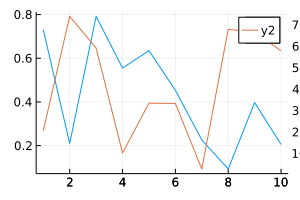

In [38]:
v1 = rand(10)
v2 = 100 * rand(10)
plot(v1, label="b", size=(300, 200))
plot!(twinx(), v2, color=2, axis=false)

In [39]:
xlabs = nyframe[!, :RegionName]

17-element Vector{Any}:
 "Yonkers"
 "Schenectady"
 "New Rochelle"
 "White Plains"
 "Town Of Ithaca"
 "Patchogue"
 "Lindenhurst"
 "Hicksville"
 "Liverpool"
 "West Babylon"
 "Town Of Carmel"
 "Rome"
 "North Tonawanda"
 "Town Of Cicero"
 "Centereach"
 "Town of Manlius"
 "Selden"

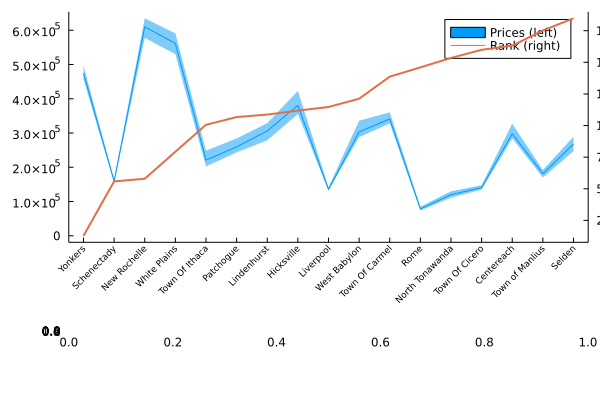

In [45]:
sz = nyframe[!, :SizeRank]
pc = nyframe[!, end]
M = Matrix(nyframe[:, 5:end])
M = copy(M')
md = findpercentile(M, 0.5)
uq = findpercentile(M, 0.75)
lq = findpercentile(M, 0.25)

plot()
plot!(md, ribbon=(md .- lq, uq .- md), color=1, grid=false, label="")
plot!(xticks=(1:length(xlabs), xlabs), xrotation=45, xtickfont=font(6))
plot!(twinx(), 
      sz, 
      color=2, 
      label="", 
      ylabel="rank", 
      grid=false, 
      xticks=[], 
      linewidth=2)
plot!(Shape([1], [1]), color=1, label="Prices (left)")
p = plot!([], [], color=2, label="Rank (right)")
ep = plot(grid=false, legend=false, axis=false, framestyle=:box) # empty
plot(p, ep, layout=@layout([a{0.85h}; b{0.001h}]))

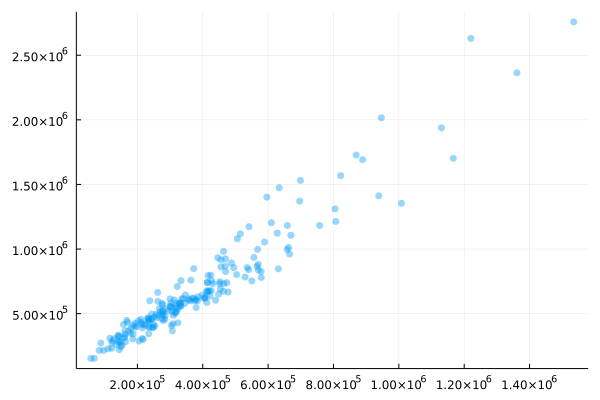

In [48]:
ca20 = caframe[!, Symbol("2020-02")]
ca10 = caframe[!, Symbol("2010-02")]
scatter(ca10, ca20, legend=false, markerstrokewidth=0, alpha=0.4)

In [55]:
caranks = caframe[!, :SizeRank];

In [56]:
contranks = caranks ./ maximum(caranks)
colorsvec = Vector{RGB{Float64}}(undef, length(contranks))
map(i -> colorsvec[i] = get(ColorSchemes.autumn1, contranks[i]), 
    1:length(colorsvec))

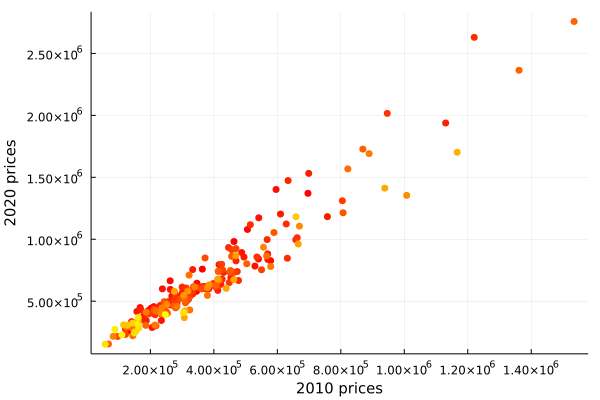

In [57]:
scatter(ca10, ca20, color=colorsvec, legend=false, markerstrokewidth=0)
xlabel!("2010 prices", xguidefontsize=10)
ylabel!("2020 prices", yguidefontsize=10)
p1 = plot!()

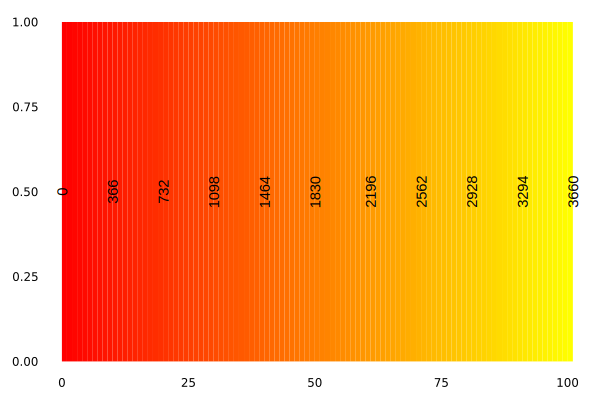

In [58]:
xv = 0:100
s = Shape([0, 1, 1, 0], [0, 0, 1, 1])
plot(s, 
     color=ColorSchemes.autumn1[1], 
     grid=false, 
     axis=false, 
     legend=false, 
     linewidth=0, 
     linecolor=nothing)

for i = 2:101
    s = Shape([xv[i], xv[i] + 1, xv[i] + 1, xv[i]], [0, 0, 1, 1])
    plot!(s, 
          color=ColorSchemes.autumn1[i], 
          grid=false, 
          axis=false, 
          legend=false, 
          linewidth=0, 
          linecolor=nothing)
end

nrmz = maximum(caranks)
xlab = 0:div(nrmz, 10):nrmz
contranks = xlab ./ nrmz
xtickloc = round.(Int, contranks .* 101)

# annotate
rotatedfont = font(10, "Helvetica", rotation=90)
for i = 1:length(xlab)
    annotate!(xtickloc[i], 0.5, text(xlab[i], rotatedfont))
end
p2 = plot!()

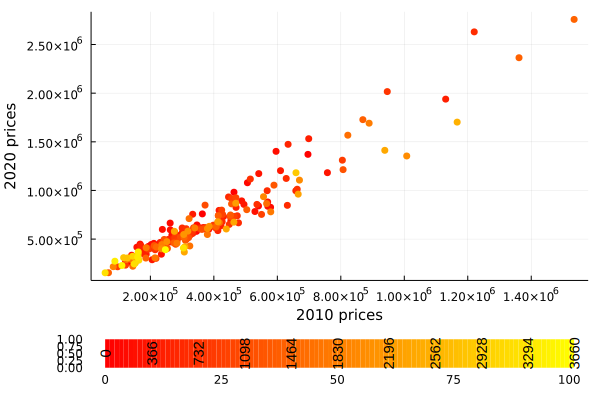

In [59]:
lo = @layout([a{0.89h}; b{0.1h}])
plot(p1, p2, layout=lo)